# Model Tuning

####  Goals
* Use the same models from benchmark scoring and fit on `X_train`, score on `X_test`.

#### Output Scores
* LassoCV: 0.971045
* BayesianRidge: 0.964379
* DecisionTree: 0.903892	
* KNN: 0.664433

In [1]:
cd ..

/home/jovyan/dsi/CAPSTONE


In [2]:
%run lib/__init__.py
%matplotlib inline

## 0. Load Data

In [3]:
# entire X_train and X_test data with augmented deskewed and scaled data and pca data
X_train = pd.read_pickle('./data/X_train_plus_pca_df.pkl')
X_test = pd.read_pickle('./data/X_test_plus_pca_df.pkl')

# y_train, y_test to run models.
y_train = pd.read_pickle('./data/y_train_new.pkl')
y_test = pd.read_pickle('./data/y_test_new.pkl')

In [4]:
X_train = pd.get_dummies(X_train)
X_test  = pd.get_dummies(X_test)

## 1. Define `model_score` function 

In [5]:
def model_score(model, model_name, X_train, X_test, y_train, y_test):
    
    scaler      = StandardScaler()
    X_train_sc  = scaler.fit_transform(X_train)
    X_test_sc   = scaler.transform(X_test)
    
    model       = model()
    model.fit(X_train_sc, y_train)
    train_score = model.score(X_train_sc, y_train)
    test_score  = model.score(X_test_sc, y_test)
    
    output = []
    output.append({'model name'  : model_name,
                   'train score' : train_score,
                   'test score'  : test_score})
    return output

In [6]:
results = []

## 2. Run Models

#### Lasso

In [7]:
lasso = model_score(LassoCV, 'Lasso', X_train, X_test, y_train, y_test)
results += lasso

#### Bayesian Ridge

In [8]:
bayesian_ridge = model_score(BayesianRidge, 'Bayesian Ridge', X_train, X_test, y_train, y_test)
results += bayesian_ridge

#### Decision Tree

In [9]:
decision_tree = model_score(DecisionTreeRegressor, 'Decision Tree', X_train, X_test, y_train, y_test)
results += decision_tree

#### KNN

In [10]:
knn = model_score(KNeighborsRegressor, 'KNN', X_train, X_test, y_train, y_test)
results += knn

## 4. Display Scores

In [11]:
results_df = pd.DataFrame(results)
results_df

,model name,test score,train score
0,Lasso,0.971045,0.987247
1,Bayesian Ridge,0.964379,0.988454
2,Decision Tree,0.903892,1.000000
3,KNN,0.664433,0.791259


## 4. Model Analysis

In [12]:
def plot_coef(model, X_train, y_train, top_n=10):
    '''
    Plots the magnitude of top and bottom n coefficients
    '''
    
    cols = X_train.columns
    model = model()
    model.fit(X_train, y_train)
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_10 = pd.DataFrame(zipped).head(top_n)
    bottom_10 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([top_10, bottom_10], axis=0).plot.barh(x = 0, y = 1, figsize=(20, 15))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


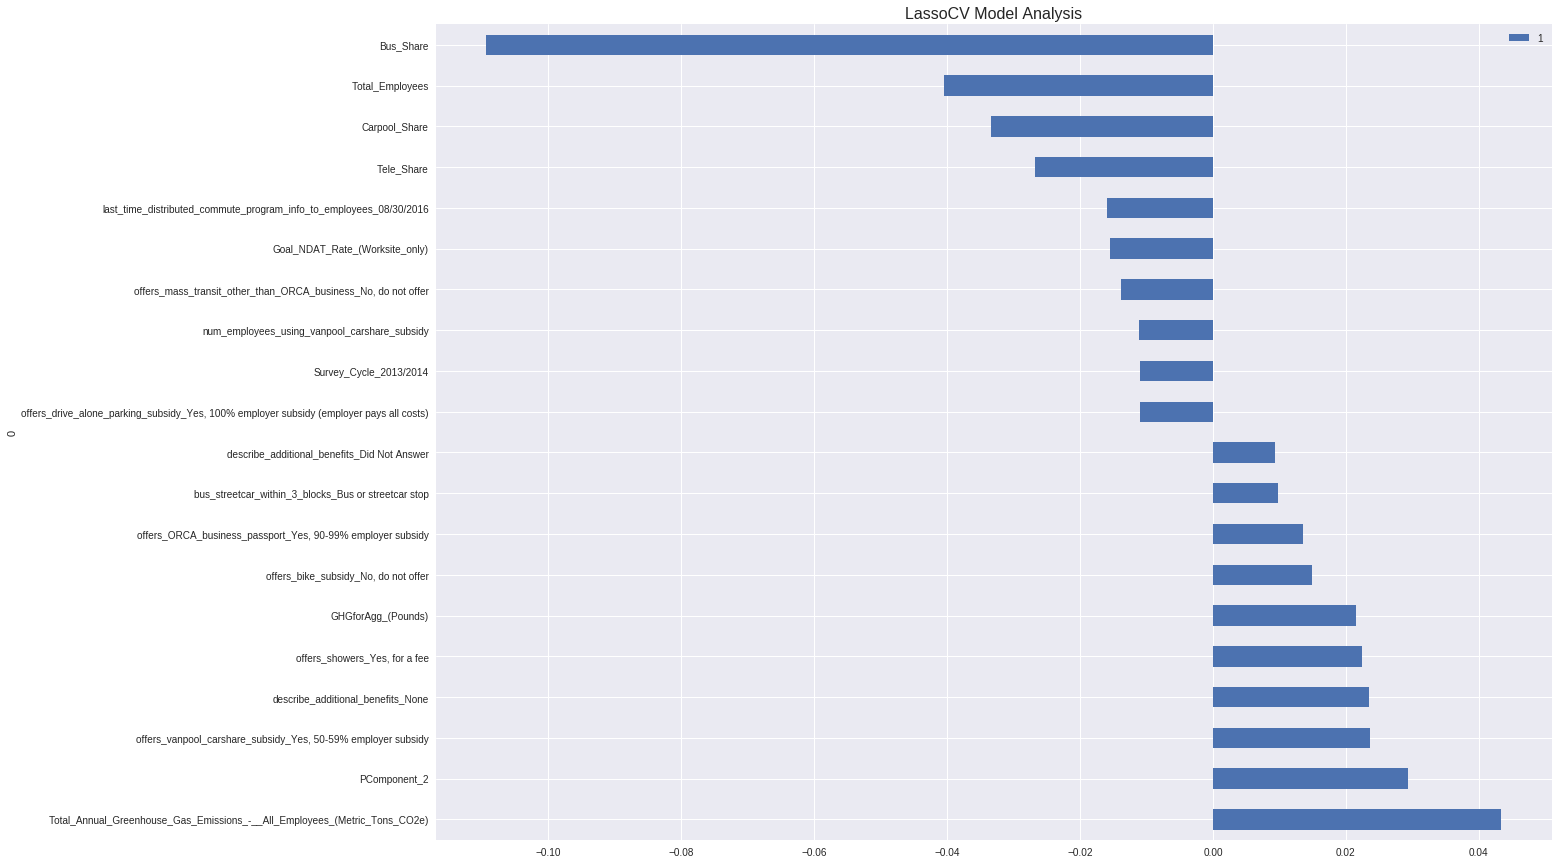

In [13]:
_ = plot_coef(LassoCV, X_train, y_train, top_n=10)
plt.title('LassoCV Model Analysis', fontsize=16)
plt.savefig('./figures/lasso-model-analysis.png')

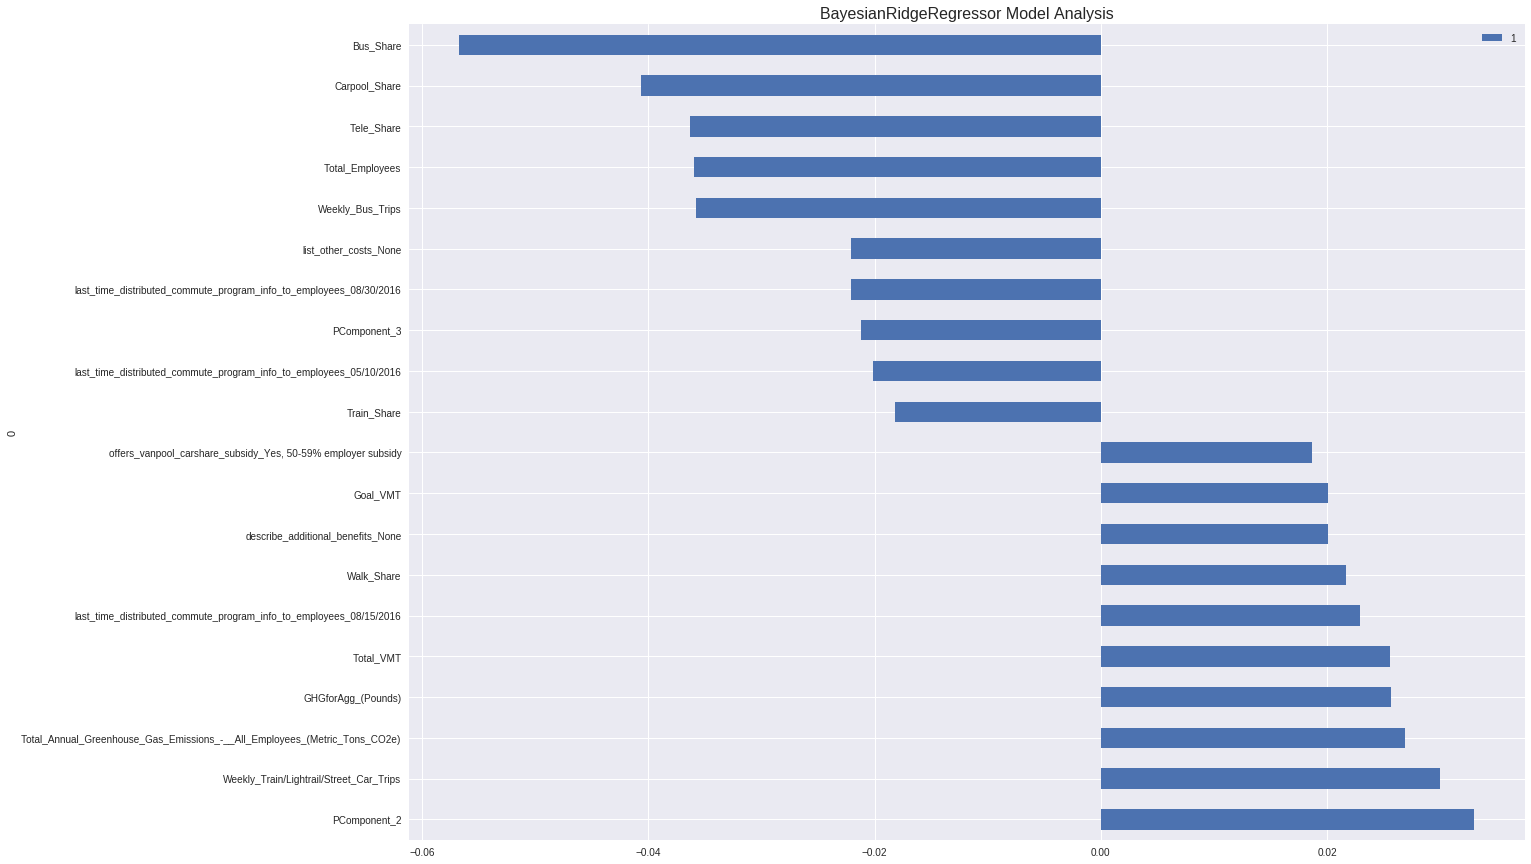

In [14]:
_ = plot_coef(BayesianRidge, X_train, y_train, top_n=10)
plt.title('BayesianRidgeRegressor Model Analysis', fontsize=16)
plt.savefig('./figures/brr-model-analysis.png')

## 4. Pickling

In [15]:
results_df.to_pickle('./data/results_df.pkl')